In [11]:
# Insert code here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import requests

In [14]:
url = 'https://raw.githubusercontent.com/yuvalpinter/nytwit/master/nytwit_v1.tsv'
data = pd.read_csv(url, sep='\t', header=0)
type(data)

pandas.core.frame.DataFrame

In [15]:
data.head()

,Time,Word,Category,URL
0,Tue Nov 07 19:12:11 2017,ujigami,filtered,https://www.nytimes.com/2017/11/07/travel/shri...
1,Tue Nov 07 19:12:15 2017,ganbarro,filtered,https://www.nytimes.com/2017/11/07/travel/shri...
2,Tue Nov 07 19:12:25 2017,yamahoko,filtered,https://www.nytimes.com/2017/11/07/travel/shri...
3,Wed Nov 08 10:01:04 2017,rememed,affix,https://www.nytimes.com/2017/11/08/opinion/ang...
4,Wed Nov 08 11:01:14 2017,andpinyon,filtered,https://www.nytimes.com/2017/11/08/sports/nava...


In [16]:
data.shape

(2587, 4)

In [17]:
data.tail()

,Time,Word,Category,URL
2582,Thu Mar 28 13:56:25 2019,deadass,affix,http://www.nytimes.com/2019/03/28/arts/music/b...
2583,Thu Mar 28 13:56:27 2019,faaamous,lengthening,http://www.nytimes.com/2019/03/28/arts/music/b...
2584,Thu Mar 28 18:56:34 2019,salpingectomy,domain,http://www.nytimes.com/2019/03/28/parenting/wh...
2585,Thu Mar 28 19:56:14 2019,strrrrrrong,lengthening,http://www.nytimes.com/2019/03/28/books/review...
2586,Thu Mar 28 19:56:23 2019,maminha,filtered,https://www.nytimes.com/2019/03/28/dining/pala...


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 4 columns):
Time        2587 non-null object
Word        2587 non-null object
Category    2587 non-null object
URL         2587 non-null object
dtypes: object(4)
memory usage: 81.0+ KB


In [24]:
data.describe(include=np.object)

,Time,Word,Category,URL
count,2587,2587,2587,2587
unique,2584,2584,19,2157
top,Thu May 31 10:03:18 2018,😘to,filtered,https://www.nytimes.com/2019/03/19/magazine/ho...
freq,2,2,1034,6


In [25]:
data.isna().sum()

Time        0
Word        0
Category    0
URL         0
dtype: int64

In [26]:
data.Time.head()

0    Tue Nov 07 19:12:11 2017
1    Tue Nov 07 19:12:15 2017
2    Tue Nov 07 19:12:25 2017
3    Wed Nov 08 10:01:04 2017
4    Wed Nov 08 11:01:14 2017
Name: Time, dtype: object

In [27]:
data['Category'].value_counts()

filtered         1034
affix             475
domain            260
deriv             211
blend             183
compound comp     123
compound new       54
lengthening        53
infl               51
dialect            46
onomatopoeia       23
variant            16
affix libfix       15
archaic            13
innovation         11
phonaestheme        6
synth               6
spaces sic          5
infix               2
Name: Category, dtype: int64

In [28]:
data['Word'].value_counts()

😘to              2
🍑to              2
is               2
cashierless      1
screamingly­     1
                ..
djiz             1
soulappella      1
postponedlate    1
inducas          1
thatness         1
Name: Word, Length: 2584, dtype: int64

In [29]:
!pip install plotly

     |████████████████████████████████| 7.2MB 2.7MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11429 sha256=4b1247ddce39dff377dcdb40ae0cb1566dea697097d13abf7d083c3adb5d68e9
  Stored in directory: /home/jovyan/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
You should consider upgrading via the 'pip install --upgrade pip' command.


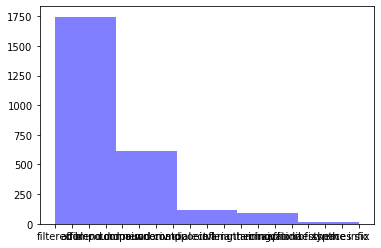

In [34]:
n, bins, patches = plt.hist(data['Category'], 5, facecolor='blue', alpha=0.5)
plt.show()

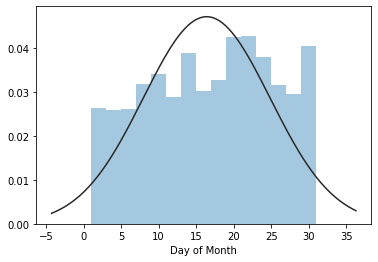

In [40]:
from scipy.stats import norm
date_df = []
for val in data['Time']:
    date_df.append(val[8:10])
date_df = pd.Series(date_df, name='Day of Month')
ax = sns.distplot(date_df, fit=norm, kde=False)